<a href="https://colab.research.google.com/github/AvChilds/mastersML/blob/main/masters_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🏡 **CFG +Masters Project: Serviced Accommodation in Essex - Analysis and Prediction**


This project dives into the world of **Serviced accommodation listings in Essex** with the goal of assisting a holiday lettings company select profitable properties to invest in based on historical Airbnb listing data.


### 🧠 Project Objective

A holiday lettings company is on the lookout for promising properties across Essex to purchase. They are seeking data insights to select properties that can earn the highest income.

The aims of this project are:
- identify the features that mostly correlates with occupancy rates and annual revenue
- build a machine learning model that predicts which types of properties achieves the highest occupancy rates and revenue potential.

### 📈 The Data

The data is retrieved from real data acquired from PriceLabs (https://www.pricelabs.co), a subscription-based database often used by property investors that provides professionally managed datasets for existing and potential Airbnb businesses.

### 🛠️ Phase 1 : Data Wrangling and Exploratory Data Analysis

This first phase analysis will focus on the following:
- **Data cleaning**: To manage missing data, fixing outliers, handling duplicates etc.
- **Pre-processing and transformation**: Merging datasets, Encoding and transforming columns as needed.
- **Exploratory Data Analysis (EDA)**


### 🔍 What I'm Exploring

- **Airbnb Host features**: Reviews, professionally managed
- **Property Details**: Property type, number of bathrooms, number of occupants
- **Amenities**: seafront, hot-tub, pets allowed, smoking allowed
- **Listing features**: Minimum length of stays, active days, blocked days


| **Category** | **Feature**         | **Description**                                         | **Data Type**          |
|--------------|---------------------|---------------------------------------------------------|------------------------|
| Property     | Number of Bedrooms  | Total number of bedrooms in the property                | Discrete Numerical     |
|              | Number of Bathrooms | Total number of bathrooms in the property               | Discrete Numerical     |
|              | Number of Guests    | Maximum number of guests allowed                        | Discrete Numerical     |
|              | Location            | Town in Essex where the property is located             | Categorical            |
| Host         | Host Ratings        | Average rating of the host                              | Continuous Numerical   |
|              | Number of Reviews   | Total number of reviews received                        | Discrete Numerical     |
| Amenities    | Seafront            | Whether the property is near the sea                    | Binary Categorical     |
|              | Hot Tub             | Availability of a hot tub                               | Binary Categorical     |
|              | Pets Allowed        | Whether pets are permitted                              | Binary Categorical     |
|              | Smoking Allowed     | Whether smoking is permitted                            | Binary Categorical     |
| Listing      | Length of Stay      | Minimum or maximum nights per stay                      | Discrete Numerical     |
|              | Active Days         | Days the listing is live and bookable                   | Discrete Numerical     |
|              | Blocked Days        | Days the listing is unavailable                         | Discrete Numerical     |
|              | Price               | Nightly price of the listing                            | Continuous Numerical   |
|              | Average Daily Rate  | How much a listing makes on average per day             | Continuous Numerical   |

#### Target Variables

| **Variable**       | **Description**                                                       | **Data Type**          |
|--------------------|-----------------------------------------------------------------------|------------------------|
| Annual Revenue      | Total income generated per listing annually                          | Continuous Numerical   |
| Occupancy Rate      | % of booked days out of total active days (Booked ÷ Active × 100)    | Continuous Numerical   |


## Import Python Modules and Data Files

In [6]:
#import libraries used for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split

In [5]:
# import data files
airbnb_2bed = pd.read_csv("airbnb_essex_2bed.csv")   # please check and use your local file path
airbnb_2bed.head()

,listing_ID,town,est_rental_revenue_median,estimated_ADR,Est_adj_occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,management,Bedrooms,bathrooms,max_guests,listed_price,is_active,economic_Category,blocked_days,rating,Num_Reviews,beachfront,hot_tub,EV_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1305239269239446863,Grays,0,NaN,0,42,NaN,NaN,NaN,3,Small,2,2.0,4,119,No,NaN,11,NaN,0,No,No,No,Yes,No,No,No
1,1323330681470281939,Grays,0,NaN,0,25,NaN,NaN,NaN,1,Small,2,2.0,4,116,No,NaN,25,5.0,1,No,No,No,Yes,No,No,No
2,960377081653062660,Grays,0,NaN,0,314,NaN,NaN,NaN,3,Individual,2,2.5,4,136,Yes,NaN,52,4.0,1,No,No,No,Yes,No,No,No
3,1270246391535349924,Grays,0,NaN,0,83,NaN,NaN,NaN,1,Individual,2,1.0,4,211,No,NaN,0,NaN,0,No,No,No,Yes,No,No,No
4,660855460760807240,Grays,0,NaN,0,363,NaN,NaN,Low,4,Small,2,1.5,5,147,Yes,NaN,3,3.0,1,No,No,No,Yes,No,No,No


In [7]:
airbnb_3bed= pd.read_csv("airbnb_essex_3bed.csv")  # please check and use your local file path
airbnb_3bed.head()

,listing_ID,town,est_rental_revenue_median,estimated_ADR,Est_adj_occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,management,Bedrooms,bathrooms,max_guests,listed_price,is_active,economic_Category,blocked_days,rating,Num_Reviews,beachfront,hot_tub,EV_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1205963819672225857,Southend-on-Sea,0,NaN,0,151,NaN,NaN,NaN,5,Individual,3,1.0,7,96,No,NaN,1,0.00,0,No,No,No,Yes,No,No,No
1,870111683833490126,Southend-on-Sea,0,NaN,0,138,NaN,NaN,NaN,14,Individual,3,2.5,6,240,No,NaN,56,0.00,0,No,No,No,Yes,No,No,No
2,46934205,Southend-on-Sea,0,NaN,0,101,NaN,NaN,NaN,1,Large,3,2.0,6,187,Yes,NaN,171,4.71,7,No,No,No,Yes,No,No,No
3,987440215251843897,Southend-on-Sea,0,NaN,0,187,NaN,NaN,NaN,3,Small,3,2.0,6,431,Yes,NaN,179,4.55,0,No,No,No,Yes,No,No,No
4,1011456380483308029,Southend-on-Sea,0,NaN,0,78,NaN,NaN,High,1,Small,3,2.0,6,228,No,NaN,63,NaN,0,No,No,No,Yes,No,No,No


In [8]:
#checking data of both data files

airbnb_2bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_ID                 879 non-null    int64  
 1   town                       879 non-null    object 
 2   est_rental_revenue_median  879 non-null    int64  
 3   estimated_ADR              817 non-null    float64
 4   Est_adj_occupancy          879 non-null    int64  
 5   active_days                879 non-null    int64  
 6   booking_window             817 non-null    float64
 7   length_of_stay             817 non-null    float64
 8   dynamic_pricing            470 non-null    object 
 9   min_stay                   879 non-null    int64  
 10  management                 879 non-null    object 
 11  Bedrooms                   879 non-null    int64  
 12  bathrooms                  879 non-null    float64
 13  max_guests                 879 non-null    int64  

In [9]:
airbnb_3bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_ID                 452 non-null    int64  
 1   town                       452 non-null    object 
 2   est_rental_revenue_median  452 non-null    int64  
 3   estimated_ADR              400 non-null    float64
 4   Est_adj_occupancy          452 non-null    int64  
 5   active_days                452 non-null    int64  
 6   booking_window             400 non-null    float64
 7   length_of_stay             400 non-null    float64
 8   dynamic_pricing            240 non-null    object 
 9   min_stay                   452 non-null    int64  
 10  management                 452 non-null    object 
 11  Bedrooms                   452 non-null    int64  
 12  bathrooms                  452 non-null    float64
 13  max_guests                 452 non-null    int64  

Both datasets have a 26 columns of features (i.e not including the listing IDs) which are identical.  12 of these are contain string values, the rest are numeric columns.

In [10]:
#Combining both datasets to create one datafram: as there are the same columns, the datasets can be concatetenated.

data = pd.concat([airbnb_2bed, airbnb_3bed], ignore_index=True)
data.shape


(1331, 27)

The dataset now as 1331 rows and 27 columns of data.

In [11]:
data.to_csv('airbnb_merged_data.csv', index=False)

## Standardisation. Cleaning, Pre-processing

### **Column standardisation**

In [12]:
#Checking columns of the dataset
data.columns

Index(['listing_ID', 'town', 'est_rental_revenue_median', 'estimated_ADR',
       'Est_adj_occupancy', 'active_days', 'booking_window', 'length_of_stay',
       'dynamic_pricing', 'min_stay', 'management', 'Bedrooms', 'bathrooms',
       'max_guests', 'listed_price', 'is_active', 'economic_Category',
       'blocked_days', 'rating', 'Num_Reviews', 'beachfront', 'hot_tub',
       'EV_charger', 'kitchen', 'pool', 'pets_allowed', 'smoking_allowed'],
      dtype='object')

In [13]:
#standardising column names to lowercase
data.columns = data.columns.str.lower()

print(f"Columns in dataset :{data.columns.values}")


Columns in dataset :['listing_id' 'town' 'est_rental_revenue_median' 'estimated_adr'
 'est_adj_occupancy' 'active_days' 'booking_window' 'length_of_stay'
 'dynamic_pricing' 'min_stay' 'management' 'bedrooms' 'bathrooms'
 'max_guests' 'listed_price' 'is_active' 'economic_category'
 'blocked_days' 'rating' 'num_reviews' 'beachfront' 'hot_tub' 'ev_charger'
 'kitchen' 'pool' 'pets_allowed' 'smoking_allowed']


In [14]:
#renaming of columns for readability

data.rename(columns = {'est_rental_revenue_median': 'year_revenue', 'estimated_adr':'avg_daily_rate', 'est_adj_occupancy':'occupancy'}, inplace=True)

In [15]:
#checking change in column names
print(f"Columns in dataset :{data.columns.values}")

Columns in dataset :['listing_id' 'town' 'year_revenue' 'avg_daily_rate' 'occupancy'
 'active_days' 'booking_window' 'length_of_stay' 'dynamic_pricing'
 'min_stay' 'management' 'bedrooms' 'bathrooms' 'max_guests'
 'listed_price' 'is_active' 'economic_category' 'blocked_days' 'rating'
 'num_reviews' 'beachfront' 'hot_tub' 'ev_charger' 'kitchen' 'pool'
 'pets_allowed' 'smoking_allowed']


### **Data Cleaning**



#### Removing duplicate listings


Duplicates (based on listing_id) in the dataset can occur as one property can feature within 2 neighbourhoods.

In [16]:
# looking at the duplicates
data[data.duplicated(subset=['listing_id'], keep=False)]

,listing_id,town,year_revenue,avg_daily_rate,occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,management,bedrooms,bathrooms,max_guests,listed_price,is_active,economic_category,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,991120607387030667,Grays,92,92.39,0,366,48.0,1.0,NaN,1,Individual,2,1.0,4,122,Yes,Midscale,0,0.00,0,No,No,No,Yes,No,No,No
24,1339734188104641921,Grays,689,86.08,15,54,7.0,6.0,NaN,2,Large,2,1.0,5,128,Yes,Midscale,58,NaN,0,No,No,No,Yes,No,No,No
32,1029075368162869978,Grays,1398,93.19,19,79,14.0,4.0,NaN,3,Individual,2,1.0,4,112,Yes,Midscale,281,NaN,0,No,No,No,Yes,No,No,No
34,1313627075795796786,Grays,1805,75.21,44,55,37.0,7.0,NaN,4,Small,2,1.0,3,122,Yes,Midscale,93,NaN,0,No,No,No,Yes,No,No,No
38,1339093830414323513,Grays,2025,84.36,42,57,5.0,5.0,Low,1,Individual,2,1.0,5,100,Yes,Midscale,39,NaN,0,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,867428043609660988,Brentwood,0,NaN,0,180,NaN,NaN,NaN,7,Small,3,1.0,6,175,Yes,NaN,186,0.00,0,No,No,No,Yes,No,Yes,No
1179,809501303830183077,Brentwood,7775,97.19,71,112,26.0,43.0,NaN,2,Individual,3,1.5,5,123,Yes,Midscale,194,5.00,4,No,No,No,Yes,No,No,No
1180,725823036821709871,Brentwood,7859,145.54,15,363,42.0,5.0,NaN,2,Small,3,2.5,8,186,Yes,Upscale,3,3.83,6,No,No,No,Yes,No,No,No
1190,872913740243580186,Brentwood,51017,147.45,98,352,75.0,18.0,NaN,1,Individual,3,3.0,6,198,Yes,Upscale,14,5.00,23,No,No,Yes,Yes,No,No,No


In [17]:
#dropping any duplicates, keeping the first occurence
data = data.drop_duplicates(subset='listing_id', keep='first')

In [18]:
#checking the remaining data after dropping duplicates
data.shape

(1236, 27)

There are now a total of 1236 rows of data

#### Remove irrelevant columns

One of the primary use of PriceLabs data is for agents and airbnb owners to determine listing prices. The columns "booking window" and "dynamic pricing" are used to determine this as is not relevant to our analysis. These columns/ features are excluded from our study.

In [19]:
data.drop(columns=['listing_id','booking_window','dynamic_pricing'],inplace=True )

#### **Missing and Zero Values**

<Axes: title={'center': 'Heatmap of Missing Values'}>

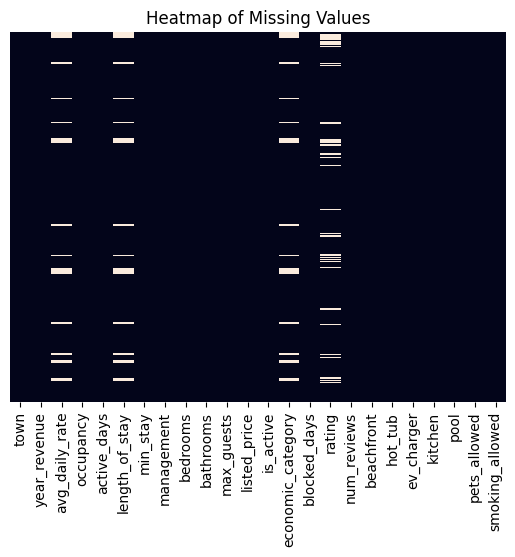

In [20]:
#analyising patterns and distributions of missing values in the data using a heatmap
plt.title('Heatmap of Missing Values')
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

In [21]:
print("Columns with missing values are:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Columns with missing values are:
avg_daily_rate       110
length_of_stay       110
economic_category    110
rating               144
dtype: int64


It also appears that there are exactly the same number of missing values (110) for 3 columns - avg_daily_rate, length_of_stay and economic_category, appearing along the same rows (listings).

In [22]:
# analysing these rows further, checking the values for target variables occupancy and annual revenue

mask = data[['avg_daily_rate', 'length_of_stay', 'economic_category']].isnull().all(axis=1)

In [23]:
data[mask][['occupancy', 'year_revenue']].describe()

,occupancy,year_revenue
count,110.0,110.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


This table confirms that these 110 rows also do not contain data for rental revenue and occupancy which suggests either the properties did not have rental data available or were not rented out during the preceeed 365 days. These rows will therefore be excluded from the study.

In [24]:
#exploring zero values for target variable
data[(data['year_revenue'] == 0)]

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,max_guests,listed_price,is_active,economic_category,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
0,Grays,0,NaN,0,42,NaN,3,Small,2,2.0,4,119,No,NaN,11,NaN,0,No,No,No,Yes,No,No,No
1,Grays,0,NaN,0,25,NaN,1,Small,2,2.0,4,116,No,NaN,25,5.0,1,No,No,No,Yes,No,No,No
2,Grays,0,NaN,0,314,NaN,3,Individual,2,2.5,4,136,Yes,NaN,52,4.0,1,No,No,No,Yes,No,No,No
3,Grays,0,NaN,0,83,NaN,1,Individual,2,1.0,4,211,No,NaN,0,NaN,0,No,No,No,Yes,No,No,No
4,Grays,0,NaN,0,363,NaN,4,Small,2,1.5,5,147,Yes,NaN,3,3.0,1,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,Grays,0,NaN,0,94,NaN,1,Small,3,3.0,8,249,No,NaN,76,0.0,0,No,No,No,Yes,No,No,No
1256,Grays,0,NaN,0,52,NaN,1,Large,3,1.0,6,150,No,NaN,35,3.5,0,No,No,No,Yes,No,No,No
1257,Grays,0,NaN,0,183,NaN,3,Large,3,1.5,8,166,Yes,NaN,183,NaN,0,No,No,No,Yes,No,Yes,No
1258,Grays,0,NaN,0,127,NaN,3,Large,3,2.0,6,152,Yes,NaN,187,4.5,0,No,No,No,Yes,No,No,No


In [25]:
# selecting rows where revenue is not equals to 0.
data = data[data['year_revenue'] != 0]
data.head(5)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,max_guests,listed_price,is_active,economic_category,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,Grays,92,92.39,0,366,1.0,1,Individual,2,1.0,4,122,Yes,Midscale,0,0.00,0,No,No,No,Yes,No,No,No
21,Grays,567,113.31,4,136,5.0,4,Moderate,2,1.0,5,130,Yes,Upscale,3,NaN,0,No,No,No,Yes,No,Yes,No
22,Grays,597,119.41,10,49,5.0,1,Large,2,2.0,4,152,No,Upscale,96,4.42,0,No,No,No,Yes,No,No,No
23,Grays,627,156.73,13,30,4.0,2,Moderate,2,2.0,5,175,No,Upscale,43,5.00,4,No,No,No,Yes,No,No,No
24,Grays,689,86.08,15,54,6.0,2,Large,2,1.0,5,128,Yes,Midscale,58,NaN,0,No,No,No,Yes,No,No,No


In [26]:
#checking for other anomalies
data.describe()

,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,blocked_days,rating,num_reviews
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1029.000000,1126.000000
mean,14183.282416,111.085444,58.397869,219.482238,11.089698,3.057726,2.351687,1.431616,5.022202,136.517762,67.636767,4.583703,26.719361
std,11384.073480,50.895556,26.713322,98.945584,8.887841,5.232144,0.477709,0.562324,1.349385,65.237925,64.608389,0.876289,48.672669
min,66.000000,24.570000,0.000000,17.000000,1.000000,1.000000,2.000000,0.000000,2.000000,28.000000,0.000000,0.000000,0.000000
25%,5385.250000,82.625000,41.000000,132.000000,4.000000,2.000000,2.000000,1.000000,4.000000,99.250000,16.000000,4.610000,2.000000
50%,11957.000000,101.125000,63.000000,229.500000,8.000000,2.000000,2.000000,1.000000,5.000000,124.000000,47.000000,4.860000,8.000000
75%,19980.750000,125.387500,79.000000,310.000000,15.750000,3.000000,3.000000,2.000000,6.000000,154.750000,102.000000,5.000000,27.000000
max,82579.000000,719.980000,100.000000,366.000000,59.000000,90.000000,3.000000,4.000000,11.000000,955.000000,324.000000,5.000000,431.000000


In [27]:
#looking for zero values in occupancy

occupancy_zero = data[data['occupancy'] == 0]
occupancy_zero

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,max_guests,listed_price,is_active,economic_category,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,Grays,92,92.39,0,366,1.0,1,Individual,2,1.0,4,122,Yes,Midscale,0,0.0,0,No,No,No,Yes,No,No,No
1199,Clacton-on-Sea,89,88.83,0,256,1.0,2,Individual,3,1.5,8,80,Yes,Midscale,110,0.0,0,No,No,No,Yes,Yes,Yes,Yes


There is only 2 rows showing 0 occupancy rate. Both also have **ratings** of zero which may suggest either data anomaly, or these are newly listed properties without historical data. These rows will be removed.

In [28]:
data = data[data['occupancy'] != 0].copy()

#### **Managing Ratings Values**

In [29]:
# checking for missing values
print("Remaining column with missing values are:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Remaining column with missing values are:
rating    97
dtype: int64


Now the only column left with missing values is the 'Rating' column with 97 missing values.

In [30]:
#Checking Ratings = 0

zero_rating= data[data['rating'] == 0]
zero_rating

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,max_guests,listed_price,is_active,economic_category,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
40,Grays,2620,58.23,68,66,17.0,2,Unknown,2,1.0,4,80,No,Economy,58,0.0,0,No,No,No,Yes,No,Yes,No
57,Grays,8163,74.21,97,113,18.0,10,Individual,2,2.0,4,96,Yes,Midscale,253,0.0,0,No,No,No,Yes,No,No,No
71,Grays,11990,92.94,53,242,4.0,2,Small,2,1.0,6,126,No,Midscale,60,0.0,0,No,No,No,Yes,No,No,No
108,Southend-on-Sea,700,116.64,2,359,1.0,1,Individual,2,1.0,4,143,Yes,Upscale,7,0.0,0,No,No,No,Yes,No,No,No
110,Southend-on-Sea,811,135.19,5,111,18.0,3,Small,2,1.0,4,150,No,Upscale,9,0.0,0,No,No,No,Yes,No,No,No
112,Southend-on-Sea,1471,98.10,5,294,2.0,1,Small,2,1.0,5,121,Yes,Midscale,72,0.0,0,No,Yes,No,Yes,No,No,No
136,Southend-on-Sea,4651,35.78,55,237,5.0,1,Individual,2,1.0,4,47,Yes,Economy,129,0.0,0,No,No,No,Yes,No,No,No
251,Chelmsford,4211,100.27,44,95,36.0,3,Individual,2,1.0,4,145,Yes,Midscale,114,0.0,0,No,No,No,Yes,No,Yes,Yes
292,Chelmsford,19583,264.64,95,78,2.0,5,Small,2,1.0,5,265,Yes,Upscale,288,0.0,0,No,No,No,Yes,No,No,No
349,Brentwood,6460,86.13,90,83,12.0,7,Individual,2,1.0,3,113,No,Midscale,155,0.0,0,No,No,No,Yes,No,Yes,No


There are 23 rows where ratings = 0.

In [31]:
#checking if there are any invalid rating values (i.e  >5)
over_five = data[data["rating"] > 5]
over_five

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,max_guests,listed_price,is_active,economic_category,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed


In [32]:
# replacing problematic values for 'rating'

valid_ratings = data["rating"][(data["rating"] >= 1)]

In [33]:
#calculating median, and replacing NaNs and zeros with the median rating
median_rating=valid_ratings.median()
data["rating"] = data["rating"].apply(lambda x: median_rating if pd.isna(x) or x == 0 else x)


In [34]:
#checking if this has resolved zero rating
zero_rating= data[data['rating'] == 0]
zero_rating

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,max_guests,listed_price,is_active,economic_category,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed


<Axes: title={'center': 'Missing Values (after data cleaning)'}>

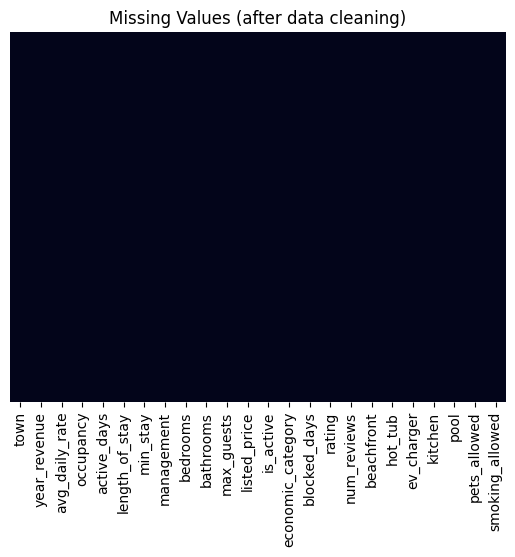

In [35]:
#checking effectiveness of removing null values in the dataset.
plt.title('Missing Values (after data cleaning)')
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

Checking missing values on the dataset using a heatmap - shows that there are no longer missing/NaN values in the dataset.

#### **Zero Values - Bathroom**

In [36]:
zero_bathroom= data[data['bathrooms'] == 0]
zero_bathroom

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,max_guests,listed_price,is_active,economic_category,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
259,Chelmsford,7969,122.60,31,213,9.0,1,Individual,2,0.0,4,143,Yes,Upscale,153,4.96,24,No,No,No,Yes,No,No,No
391,Brentwood,27524,108.36,71,359,19.0,1,Small,2,0.0,6,155,Yes,Upscale,7,4.64,42,No,No,No,Yes,No,No,No
468,Colchester,7011,56.09,60,208,22.0,2,Small,2,0.0,3,94,Yes,Economy,78,5.00,4,No,No,Yes,Yes,No,No,No
1212,Clacton-on-Sea,2952,105.43,13,212,4.0,2,Individual,3,0.0,7,112,No,Midscale,145,4.57,7,No,No,No,Yes,No,Yes,No


There are 4 row with 0 bathrooms

In [37]:
print(data['bathrooms'].value_counts())

bathrooms
1.0    603
2.0    248
1.5    180
2.5     60
3.0     25
0.0      4
4.0      3
3.5      1
Name: count, dtype: int64


As there are only 4 listings without bathrooms, we have decided to use the mode (most frequently occuring value) to replace the zero values as it is assumed that these properties are most likely to have this number of bathrooms.

In [38]:
bathroom_mode = data['bathrooms'].mode()[0]
print("Mode of bathrooms:", bathroom_mode)

Mode of bathrooms: 1.0


In [39]:
#Replace zero values with the mode
data['bathrooms'] = data['bathrooms'].replace(0, bathroom_mode)
print(data['bathrooms'].value_counts()) # checking if zero values are now replaced

bathrooms
1.0    607
2.0    248
1.5    180
2.5     60
3.0     25
4.0      3
3.5      1
Name: count, dtype: int64


### Outlier management

In [40]:
data.describe()

,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,blocked_days,rating,num_reviews
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,14208.358541,111.121877,58.501779,219.319395,11.107651,3.060498,2.351423,1.435498,5.020463,136.580961,67.659253,4.715151,26.766904
std,11378.646570,50.933460,26.623074,98.930957,8.885538,5.236345,0.477627,0.556731,1.347313,65.272739,64.622022,0.475457,48.702917
min,66.000000,24.570000,1.000000,17.000000,1.000000,1.000000,2.000000,1.000000,2.000000,28.000000,0.000000,1.000000,0.000000
25%,5424.250000,82.605000,41.000000,132.000000,4.000000,2.000000,2.000000,1.000000,4.000000,99.750000,16.000000,4.680000,2.000000
50%,11969.500000,101.165000,63.000000,229.000000,8.000000,2.000000,2.000000,1.000000,5.000000,124.000000,47.000000,4.860000,8.000000
75%,19984.000000,125.407500,79.000000,310.000000,16.000000,3.000000,3.000000,2.000000,6.000000,155.000000,102.000000,4.990000,27.000000
max,82579.000000,719.980000,100.000000,366.000000,59.000000,90.000000,3.000000,4.000000,11.000000,955.000000,324.000000,5.000000,431.000000


Outliers in this study could be caused by the following:

Our target variables for this study are annual revenue (**year_revenue**) and occupancy rate (**occupancy**), the rest are independent variables ('features') for this study. There is a signicant difference between the max value and the 75th percentiles for both these values which suggest possible outliers or data anomalies which will need further analysis

Within the features, there are also larger at expected intervals between 75th percentile and max values for the following: **avg_daily_rate**, **length_of_stay**, **min_stay**, **listed_price**, **blocked_days**, **num_reviews**. These will also be looked at more closely to determine if these are possible data errors or listing errors.

A minimum occupancy of 0 and min revenue of £66 are contradictory. Zero minimum values for **bathrooms** and **ratings** also need further investigation as neither of these can contain zero values

#### **Visualising Outliers with Boxplots**

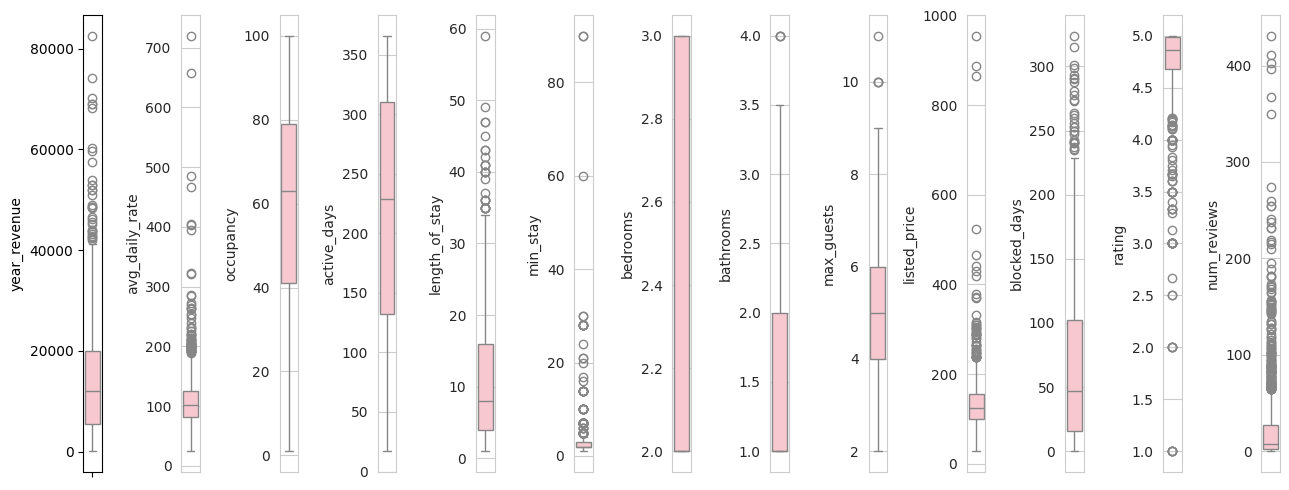

In [41]:
# Get numeric columns only, excluding 'listing_id'
numeric_cols = data.select_dtypes(include='number').columns
l = numeric_cols.values
# Set number of plots per row (columns of the figure grid)
number_of_columns = len(l)
number_of_rows=1

plt.figure(figsize=(number_of_columns, 5*number_of_rows))

for i, col in enumerate(l):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(data=data[col], color='pink', orient='v')

    plt.tight_layout()

plt.show()

Boxplots display the median, interquartile range (IQR) and any data points that fall outside of 1.5 *IQR from the lower or uppoer quartiles(shown as circles).

Observations:
 1. year_revenue and avg_daily_rate, listed price:
 Both variables exhibit several high-value outliers, likely representing luxury or premium listings. These extreme values can disproportionately influence regression models. To address this, transformation techniques such as log-scaling or capping via winsorization may be necessary.

 2. min_stay, blocked_days:
These features contain notable outliers, including unusually long stay requirements and listings blocked for most of the year. Such anomalies may not reflect typical booking behaviour and could distort model outcomes or reduce predictive reliability. Removing or adjusting these entries may improve data quality and model performance.




#### Using Winsorization

In [42]:
#Using winsorization for outlier management
winsor_cols = ['year_revenue', 'avg_daily_rate', 'listed_price']

for col in winsor_cols:
    data[col] = winsorize(data[col], limits=[0.01, 0.01])

#### Using Threshold caps

In [43]:
# Using threshold caps
#min stay for serviced accommodation  set at 7 days

min_stay_count = data[data['min_stay'] > 7].shape[0]
print(f"Listings with min_stay > 7 days: {min_stay_count}")

Listings with min_stay > 7 days: 39


In [44]:
#min blocked days - 225 days
blocked_days_count = data[data['blocked_days'] > 225].shape[0]
print(f"Listings with blocked_days > 225 days: {blocked_days_count}")

Listings with blocked_days > 225 days: 33


In [45]:
data_filtered = data[(data['min_stay'] <= 7) & (data['blocked_days'] <= 225)]

In [46]:
print(f"Original dataset size: {data.shape[0]}")
print(f"Filtered dataset size: {data_filtered.shape[0]}")

Original dataset size: 1124
Filtered dataset size: 1054


In [47]:
data = data_filtered


In [48]:
data.describe()

,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,blocked_days,rating,num_reviews
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,14437.970588,110.416746,58.422201,223.360531,10.618596,2.355787,2.362429,1.438805,5.047438,134.805503,61.523719,4.713814,27.374763
std,10975.175865,40.724808,26.432755,98.208855,8.366185,1.375260,0.480930,0.562607,1.338178,49.073787,55.601220,0.470203,48.531688
min,267.000000,47.210000,1.000000,17.000000,1.000000,1.000000,2.000000,1.000000,2.000000,58.000000,0.000000,1.000000,0.000000
25%,5634.250000,82.815000,41.000000,138.250000,4.000000,1.000000,2.000000,1.000000,4.000000,100.000000,16.000000,4.670000,2.000000
50%,12490.500000,101.940000,63.000000,234.000000,8.000000,2.000000,2.000000,1.000000,5.000000,125.000000,43.000000,4.860000,9.000000
75%,20623.500000,125.982500,78.000000,313.000000,14.000000,3.000000,3.000000,2.000000,6.000000,155.000000,96.000000,4.980000,28.000000
max,52944.000000,272.970000,100.000000,366.000000,59.000000,7.000000,3.000000,4.000000,11.000000,331.000000,225.000000,5.000000,431.000000


In [49]:
# examining columns with categorical data

categorical_cols = [
    'town', 'management', 'is_active', 'economic_category',
    'beachfront', 'hot_tub', 'ev_charger', 'kitchen',
    'pool', 'pets_allowed', 'smoking_allowed'
]

# Summary info for each categorical column
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts(dropna=False))
    print(f"Unique Values: {data[col].nunique()}")


Column: town
town
Colchester         295
Southend-on-Sea    216
Clacton-on-Sea     142
Grays              118
Chelmsford         114
Brentwood           64
Walton-on-Naze      59
Saffron-Walden      46
Name: count, dtype: int64
Unique Values: 8

Column: management
management
Small         371
Individual    361
Moderate      175
Large         137
Unknown        10
Name: count, dtype: int64
Unique Values: 5

Column: is_active
is_active
Yes    770
No     284
Name: count, dtype: int64
Unique Values: 2

Column: economic_category
economic_category
Midscale    631
Upscale     320
Economy     103
Name: count, dtype: int64
Unique Values: 3

Column: beachfront
beachfront
No     1048
Yes       6
Name: count, dtype: int64
Unique Values: 2

Column: hot_tub
hot_tub
No     1011
Yes      43
Name: count, dtype: int64
Unique Values: 2

Column: ev_charger
ev_charger
No     1034
Yes      20
Name: count, dtype: int64
Unique Values: 2

Column: kitchen
kitchen
Yes    1023
No       31
Name: count, dtype: int

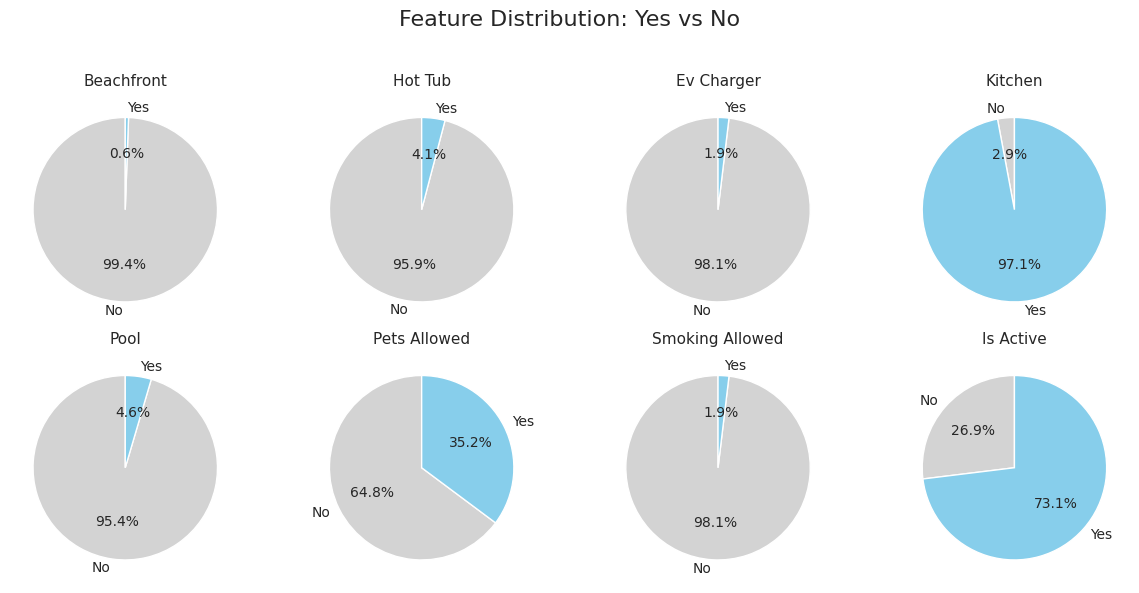

In [50]:
binary_features = {
    'beachfront': [1048, 6],
    'hot_tub': [1011, 43],
    'ev_charger': [1034, 20],
    'kitchen': [31, 1023],
    'pool': [1006, 48],
    'pets_allowed': [683, 371],
    'smoking_allowed': [1034, 20],
    'is_active': [284, 770]
}

labels = ['No', 'Yes']
colors = ['lightgrey', 'skyblue']

# Set up subplot grid
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i, (feature, values) in enumerate(binary_features.items()):
    ax = axes[i]
    ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.set_title(feature.replace('_', ' ').title(), fontsize=11)

# Adjust layout
plt.suptitle('Feature Distribution: Yes vs No', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1054 entries, 21 to 1330
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   town               1054 non-null   object 
 1   year_revenue       1054 non-null   int64  
 2   avg_daily_rate     1054 non-null   float64
 3   occupancy          1054 non-null   int64  
 4   active_days        1054 non-null   int64  
 5   length_of_stay     1054 non-null   float64
 6   min_stay           1054 non-null   int64  
 7   management         1054 non-null   object 
 8   bedrooms           1054 non-null   int64  
 9   bathrooms          1054 non-null   float64
 10  max_guests         1054 non-null   int64  
 11  listed_price       1054 non-null   int64  
 12  is_active          1054 non-null   object 
 13  economic_category  1054 non-null   object 
 14  blocked_days       1054 non-null   int64  
 15  rating             1054 non-null   float64
 16  num_reviews        1054 non-

## **Exploratory Data Analysis**

### Revenue

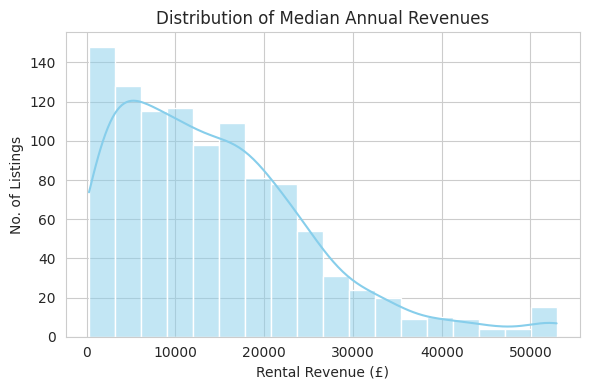

In [52]:
#Visualising distributions

plt.figure(figsize=(6, 4))

sns.histplot(x=data['year_revenue'], kde=True, color='skyblue')
plt.title('Distribution of Median Annual Revenues')
plt.xlabel('Rental Revenue (£)')
plt.ylabel('No. of Listings')

plt.tight_layout()
plt.show()

In [53]:
# looking at the top 10 listings with highest revenues:
data[data['year_revenue']>40000].sort_values(by='year_revenue', ascending=False).head(10)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,max_guests,listed_price,is_active,economic_category,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
623,Colchester,52944,201.33,100,350,7.0,2,Large,2,2.0,4,281,Yes,Upscale,16,5.00,6,No,No,No,Yes,No,No,No
622,Colchester,52944,192.79,99,313,6.0,1,Large,2,1.5,4,166,Yes,Upscale,49,5.00,3,No,Yes,No,Yes,No,Yes,No
621,Colchester,52944,147.57,100,366,5.0,3,Small,2,2.0,4,194,Yes,Upscale,0,5.00,4,No,Yes,No,Yes,No,Yes,No
620,Colchester,52944,272.97,95,138,3.0,2,Large,2,1.0,4,313,No,Upscale,6,4.67,3,No,Yes,No,Yes,No,Yes,No
1161,Colchester,52944,210.89,95,286,2.0,1,Large,3,2.0,6,303,Yes,Upscale,80,5.00,4,No,No,No,Yes,No,Yes,No
1162,Colchester,52944,231.36,98,304,5.0,2,Large,3,3.0,6,290,Yes,Upscale,62,5.00,1,No,No,No,Yes,No,Yes,No
1160,Colchester,52944,177.78,91,326,5.0,2,Individual,3,2.0,6,171,Yes,Upscale,40,4.85,144,No,No,No,Yes,No,Yes,No
1307,Grays,52944,272.97,70,366,2.0,1,Individual,3,1.5,7,331,Yes,Upscale,0,4.86,0,No,No,No,Yes,No,No,Yes
680,Saffron-Walden,52944,188.33,100,362,5.0,3,Moderate,2,1.0,4,252,Yes,Upscale,4,5.00,4,No,No,No,Yes,No,Yes,No
681,Saffron-Walden,52944,272.97,61,354,2.0,2,Small,2,2.5,4,331,Yes,Upscale,12,5.00,11,No,Yes,Yes,Yes,No,No,No


It can be observed that properties with high revenue have relatively high average daily rates and occupancies (above 70%). This may suggest  that these outliers may be genuine high performing properties.


In [54]:
# looking at the listings with lowest revenues:
data[data['year_revenue']<12000].sort_values(by='year_revenue', ascending=True).head(20)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,max_guests,listed_price,is_active,economic_category,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
690,Clacton-on-Sea,267,64.15,2,161,2.0,2,Individual,2,1.0,5,77,Yes,Midscale,164,4.86,0,No,No,No,Yes,Yes,Yes,No
798,Walton-on-Naze,267,182.71,1,69,1.0,1,Small,2,1.0,4,188,No,Upscale,55,4.86,1,No,No,No,Yes,No,Yes,No
898,Southend-on-Sea,267,107.80,2,56,1.0,1,Individual,3,1.5,6,125,No,Midscale,0,5.00,0,No,No,No,Yes,No,No,No
1260,Grays,267,108.68,1,164,1.0,1,Small,3,1.0,6,131,No,Midscale,72,4.33,6,No,No,No,Yes,No,No,No
241,Chelmsford,267,131.05,2,55,1.0,2,Large,2,1.0,4,126,Yes,Upscale,61,5.00,2,No,No,No,Yes,No,No,No
1200,Clacton-on-Sea,267,117.29,7,30,2.0,1,Small,3,2.0,6,154,No,Midscale,99,4.86,0,No,No,No,Yes,Yes,No,No
899,Southend-on-Sea,267,133.46,1,190,1.0,1,Individual,3,1.0,6,160,Yes,Midscale,176,5.00,1,No,No,No,Yes,No,No,No
328,Brentwood,267,85.42,3,35,1.0,1,Small,2,2.0,2,98,No,Midscale,7,4.86,0,No,No,No,Yes,No,No,No
412,Colchester,267,65.21,2,159,1.0,1,Small,2,1.0,3,86,Yes,Economy,167,5.00,1,No,No,No,Yes,No,No,No
410,Colchester,267,66.24,1,177,1.0,4,Moderate,2,1.0,4,108,Yes,Economy,185,4.86,0,No,No,No,Yes,No,Yes,No


In [55]:
low_rev = data[data['year_revenue'] < 12500]
high_rev = data[data['year_revenue'] >= 12500]

print(f"{len(high_rev)} listings are at 50th percentile of revenue (threshold = £12500)")

526 listings are at 50th percentile of revenue (threshold = £12500)


In [56]:
#creating a comparison table of features from low vs high revenue

summary = pd.DataFrame({
    'Low Revenue (<12500)':low_rev.mean(numeric_only=True),
    'High Revenue (≥12500)': high_rev.mean(numeric_only=True)
})
display(summary.style.format("{:.2f}"))

,Low Revenue (<12500),High Revenue (≥12500)
year_revenue,5956.09,22952.10
avg_daily_rate,101.54,119.33
occupancy,45.00,71.90
active_days,163.48,283.46
length_of_stay,10.81,10.42
min_stay,2.37,2.34
bedrooms,2.36,2.37
bathrooms,1.39,1.49
max_guests,4.97,5.12
listed_price,125.57,144.08


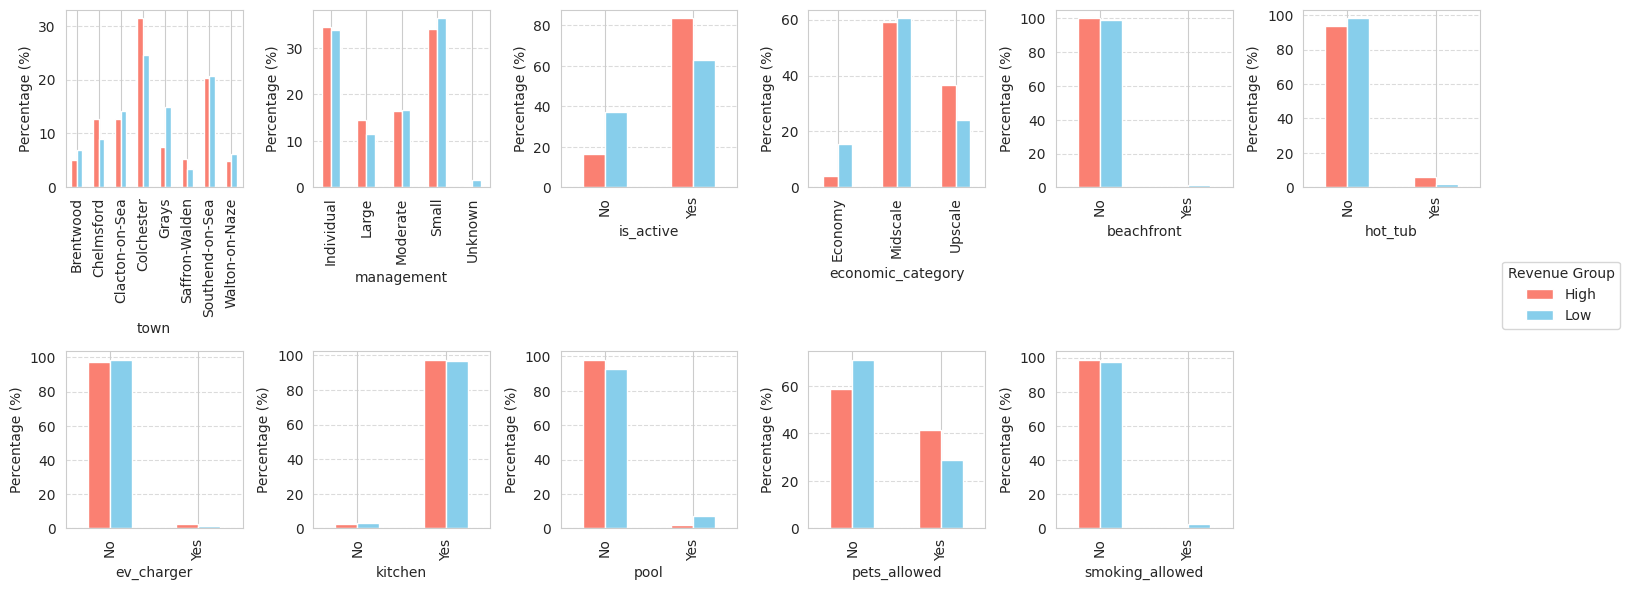

In [57]:
threshold = 12500
data['revenue_group'] = data['year_revenue'].apply(
    lambda x: 'High' if x >= threshold else 'Low'
)
n_cols = 6
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Plot bar charts
for i, col in enumerate(categorical_cols):
    group_dist = pd.crosstab(data[col], data['revenue_group'], normalize='columns') * 100
    group_dist = group_dist.round(2)
    group_dist.plot(kind='bar', ax=axes[i], color=['salmon', 'skyblue'], legend=False)


    axes[i].set_ylabel('Percentage (%)')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), title='Revenue Group')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Higher revenues are associated with:
- Chelmsford and Colchester areas
- Management by larger organisations
- Active listings
- Upscale economic category
- Availability of a hot tub
- Availability of EV charger
- No pool
- Pets allowed
- No smoking

It is however important to note that due to the imbalance of the data, it would be difficult to determine significance in these relationships.

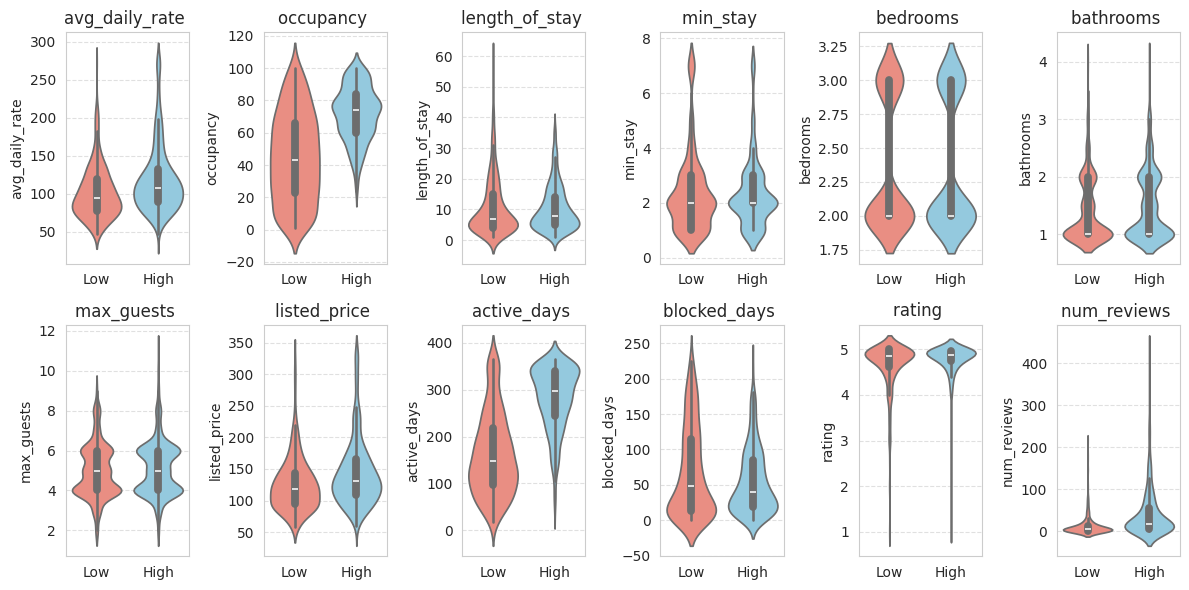

In [58]:
numerical_cols = [
    'avg_daily_rate', 'occupancy', 'length_of_stay', 'min_stay', 'bedrooms',
    'bathrooms', 'max_guests', 'listed_price', 'active_days', 'blocked_days',
    'rating', 'num_reviews'
]
n_cols = 6
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()


for i, col in enumerate(numerical_cols):
    sns.violinplot(x='revenue_group', y=col, data=data, ax=axes[i], hue='revenue_group', palette=['salmon', 'skyblue'], legend=False)
    axes[i].set_title(f'{col} ')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.6)

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Observations for higher revenue yielding properties:
- higher average daily rate
- higher occupancy
- higher number of active days
- lower length of stay
- higher listed price
- less blocked days
- higher number of reviews


### Occupancy

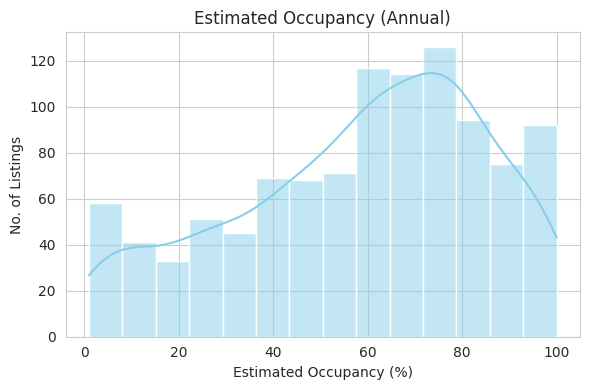

In [59]:
plt.figure(figsize=(6, 4))

sns.histplot(x=data['occupancy'], kde=True, color='skyblue')
plt.title('Estimated Occupancy (Annual)')
plt.xlabel('Estimated Occupancy (%)')
plt.ylabel('No. of Listings')

plt.tight_layout()
plt.show()

In [60]:
data['occupancy'].describe()

,occupancy
count,1054.000000
mean,58.422201
std,26.432755
min,1.000000
25%,41.000000
50%,63.000000
75%,78.000000
max,100.000000


In [61]:
# analysing low occupancy listings.
low_occupancy_threshold = 60
low_occupancy = data[data['occupancy'] < low_occupancy_threshold]

print(f"{len(low_occupancy)} listings have occupancy < {low_occupancy_threshold}%")
display(low_occupancy.sort_values(by='occupancy'))

473 listings have occupancy < 60%


,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,max_guests,listed_price,is_active,economic_category,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed,revenue_group
798,Walton-on-Naze,267,182.71,1,69,1.0,1,Small,2,1.0,4,188,No,Upscale,55,4.86,1,No,No,No,Yes,No,Yes,No,Low
799,Walton-on-Naze,376,75.23,1,361,5.0,3,Individual,2,1.5,6,84,Yes,Midscale,5,4.50,10,No,No,No,Yes,Yes,Yes,No,Low
1260,Grays,267,108.68,1,164,1.0,1,Small,3,1.0,6,131,No,Midscale,72,4.33,6,No,No,No,Yes,No,No,No,Low
899,Southend-on-Sea,267,133.46,1,190,1.0,1,Individual,3,1.0,6,160,Yes,Midscale,176,5.00,1,No,No,No,Yes,No,No,No,Low
900,Southend-on-Sea,428,213.88,1,184,2.0,2,Individual,3,1.0,8,250,Yes,Upscale,182,4.86,0,No,No,No,Yes,No,No,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,Southend-on-Sea,51839,272.97,59,122,2.0,1,Individual,2,2.5,4,331,No,Upscale,0,4.86,1,No,Yes,No,Yes,No,No,No,High
212,Southend-on-Sea,19101,103.81,59,314,9.0,2,Individual,2,2.0,6,119,Yes,Midscale,52,4.95,40,No,No,No,Yes,No,No,No,High
1187,Brentwood,28409,143.48,59,334,5.0,2,Individual,3,1.0,6,156,Yes,Upscale,32,4.74,82,No,No,No,Yes,No,No,No,High
311,Chelmsford,27163,129.97,59,354,18.0,3,Moderate,2,1.0,5,161,Yes,Upscale,12,5.00,2,No,No,No,Yes,No,Yes,No,High


In [62]:
low_occ = data[data['occupancy'] < 63]
high_occ = data[data['occupancy'] >= 63]
print(low_occ.info(), high_occ.info())

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 21 to 1324
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   town               524 non-null    object 
 1   year_revenue       524 non-null    int64  
 2   avg_daily_rate     524 non-null    float64
 3   occupancy          524 non-null    int64  
 4   active_days        524 non-null    int64  
 5   length_of_stay     524 non-null    float64
 6   min_stay           524 non-null    int64  
 7   management         524 non-null    object 
 8   bedrooms           524 non-null    int64  
 9   bathrooms          524 non-null    float64
 10  max_guests         524 non-null    int64  
 11  listed_price       524 non-null    int64  
 12  is_active          524 non-null    object 
 13  economic_category  524 non-null    object 
 14  blocked_days       524 non-null    int64  
 15  rating             524 non-null    float64
 16  num_reviews        524 non-nu

In [63]:
summary = pd.DataFrame({
    'Low Occupancy (<63%)':low_occ.mean(numeric_only=True),
    'High Occupancy (≥63%)': high_occ.mean(numeric_only=True)
})
display(summary.style.format("{:.2f}"))

,Low Occupancy (<63%),High Occupancy (≥63%)
year_revenue,9487.01,19332.88
avg_daily_rate,112.80,108.06
occupancy,36.69,79.90
active_days,219.02,227.65
length_of_stay,8.84,12.37
min_stay,2.30,2.42
bedrooms,2.40,2.32
bathrooms,1.44,1.44
max_guests,5.19,4.91
listed_price,138.03,131.62


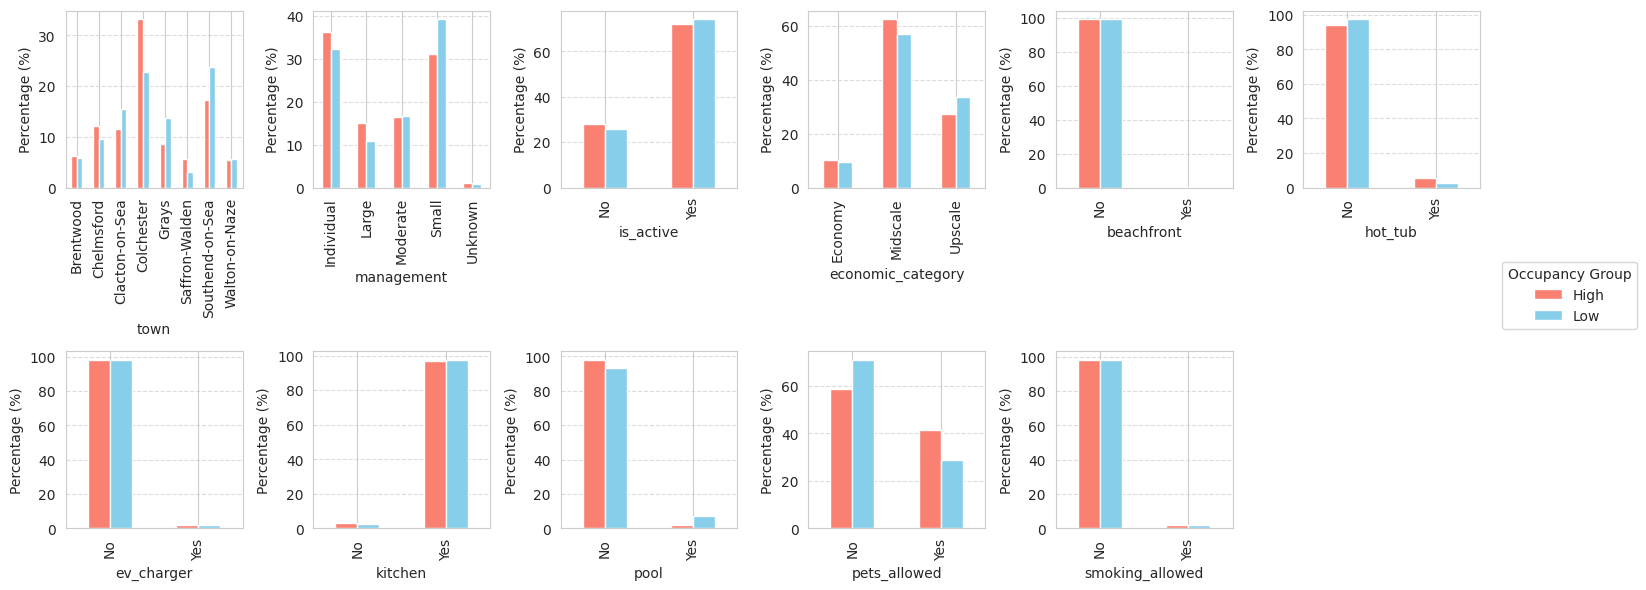

In [64]:
# visualising categorical features

threshold = 63
data['occupancy_group'] = data['occupancy'].apply(
    lambda x: 'High' if x >= threshold else 'Low'
)
n_cols = 6
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Plot bar charts
for i, col in enumerate(categorical_cols):
    group_dist = pd.crosstab(data[col], data['occupancy_group'], normalize='columns') * 100
    group_dist = group_dist.round(2)
    group_dist.plot(kind='bar', ax=axes[i], color=['salmon', 'skyblue'], legend=False)


    axes[i].set_ylabel('Percentage (%)')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), title='Occupancy Group')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Higher occupancy appears to be accociated with the following categorical data:
- Chemlsford and Colchester
- Economic Cateogory: Midscale
- Management: Individuals or large companies
- Availabilty of a hot tub
- No pool
- Pets allowed

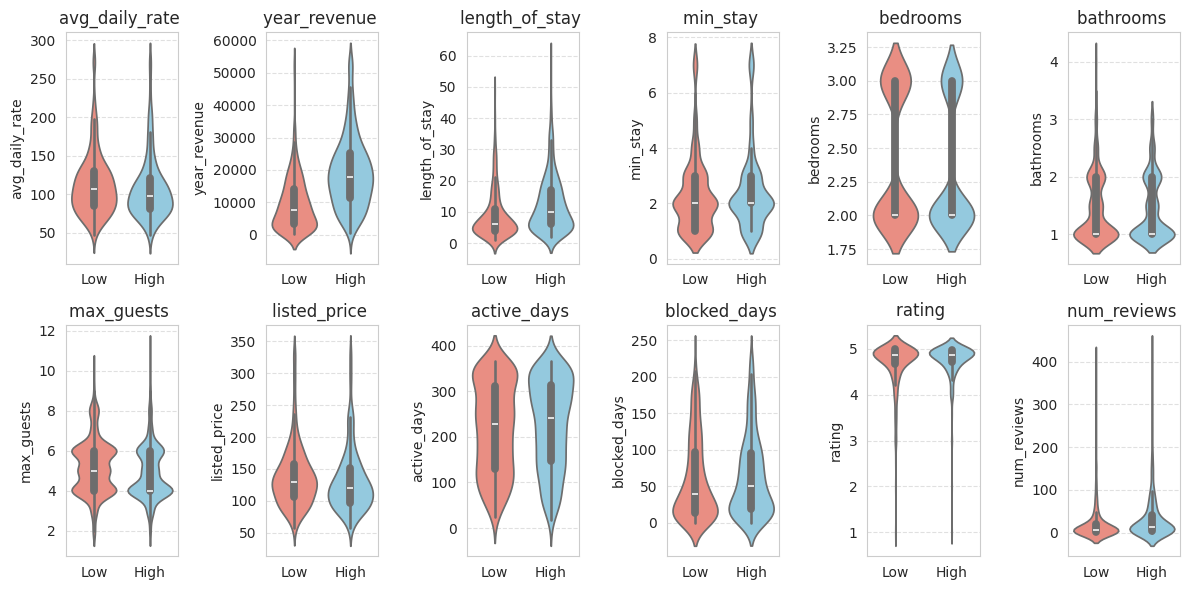

In [65]:
numerical_cols = [
    'avg_daily_rate', 'year_revenue', 'length_of_stay', 'min_stay', 'bedrooms',
    'bathrooms', 'max_guests', 'listed_price', 'active_days', 'blocked_days',
    'rating', 'num_reviews'
]
n_cols = 6
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(x='occupancy_group', y=col, data=data, ax=axes[i], hue='occupancy_group', palette=['salmon', 'skyblue'], legend=False)
    axes[i].set_title(f'{col} ')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.6)

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Higher occupancy is associated with
- lower average daily rate
- higher active days (i.e listings)
- higher length of stays
- less bedrooms
- lower maximum guests
- lower listed price
- higher number of reviews

There does not appear to be any significant difference between 2 and 3 bedroom properties or number of bathrooms.

### **Correlation**


#### Data Pre-processing

In [66]:
data_encoded = data.copy()

In [67]:
from sklearn import preprocessing

for x in data_encoded.columns:
    if data_encoded[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder() # encoding
        lbl.fit(list(data_encoded[x].values)) # fitting the model
        data_encoded[x] = lbl.transform(list(data_encoded[x].values)) # transforming into various integer codes

### Heatmaps

<Axes: title={'center': 'Heatmap of Serviced Accommodation Variables with Occupancy'}>

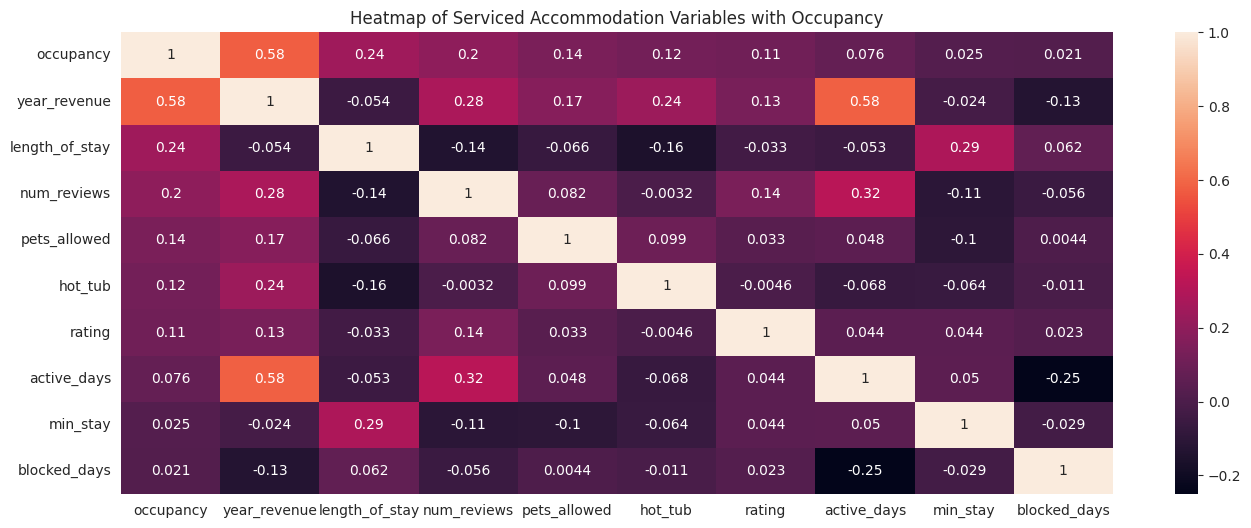

In [68]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
plt.title('Heatmap of Serviced Accommodation Variables with Occupancy')


#Quality correlation matrix

k = 10  # number of variables for heatmap # want to just pick out the top 12
cols = data_encoded.corr().nlargest(k, 'occupancy')['occupancy'].index  # method
cm = data_encoded[cols].corr()

sns.heatmap(cm, annot=True)

Occupancy: the features that appear to be the most correlated are  number of reviews and length of stay


<Axes: title={'center': 'Heatmap of Serviced Accommodation Variables vs Revenue'}>

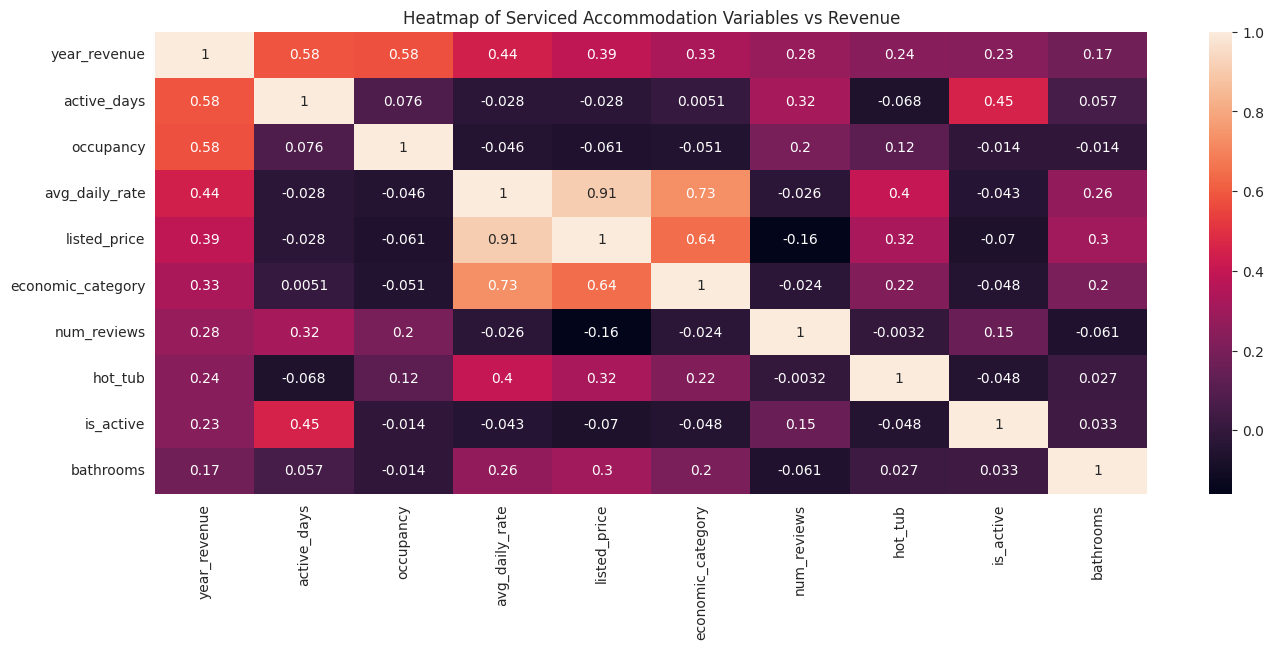

In [70]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
plt.title('Heatmap of Serviced Accommodation Variables vs Revenue')


#Quality correlation matrix

k =10  # number of variables for heatmap # want to just pick out the top 12
cols = data_encoded.corr().nlargest(k, 'year_revenue')['year_revenue'].index  # method
cm = data_encoded[cols].corr()

sns.heatmap(cm, annot=True)

Annual revenue: Highest correlation occurs with the number of active days listed, average daily rate and listed price, economic category  and number of reviews.

### Summary of Findings for EDA


Whilst calculating correlational coefficients have not show strong correlations between property features, occupancy rates and annual revenue, some patterns have emerged.

**Property Features**
Chelmsford and Colchester appear to be the most likely areas of higher occupancy rates and higher annual return.
There is no evidence to show that more bedrooms, beachfront properties or availablility of a pool or EV charger on the properties will yield better earnings.
There is some weak evidence that the availability of a hot-tub, properties considered within a higher economic bracket, more bathrooms and pet-friendly may be slightly more profitable.

**Listing and Host Features**
Listed price and average daily rate of a property has the strongest relationship with revenue but does not impact occupancy rates. For both target variables, the listing has a positive correlationship with occupancy and revenue, suggesting that customers are more likely to book  a property if that property has had a record of reviews. However, rating has a weak correlation between both groups.


## **Phase 2 - Machine Learning - Predictive Modelling**

In [71]:
#import libraries used for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [118]:


from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

1. Preprocessing the Data

- Drop multicollinear and redundant features.
- Encode categorical variables.
- Scale numerical features.
- Split the data into train/validation/test sets.

2. The data will be split into the following:

- 70% Training
- 15% Validation
- 15% Test

3. Models to Use

- Logistic Regression
- Random Forest Classifier (good with tabular data, handles nonlinearities well)
- XGBoost Classifier (powerful gradient boosting method)
- Support Vector Machine (SVC) or K-Nearest Neighbors (for contrast)

We will compare their performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.



### **SELECTION OF TARGET VARIABLE**

The primary objective for a serviced accommodation business is to acquire properties that generate the highest possible annual revenue. Based on the heatmap analysis of the target variables and features, there is a strong positive correlation between occupancy and annual revenue, with a correlation coefficient of 0.58. Similarly, active days also show a strong correlation with revenue. This is expected, as revenue is a function of both the average daily rate and the number of days the property is occupied — which is closely linked to how many days the listing is active.

The scatterplot below illustrates the multicollinearity between active days, occupancy, and revenue, highlighting how these variables interact to influence the property's earning potential.

Text(0, 0.5, 'Annual Revenue (£)')

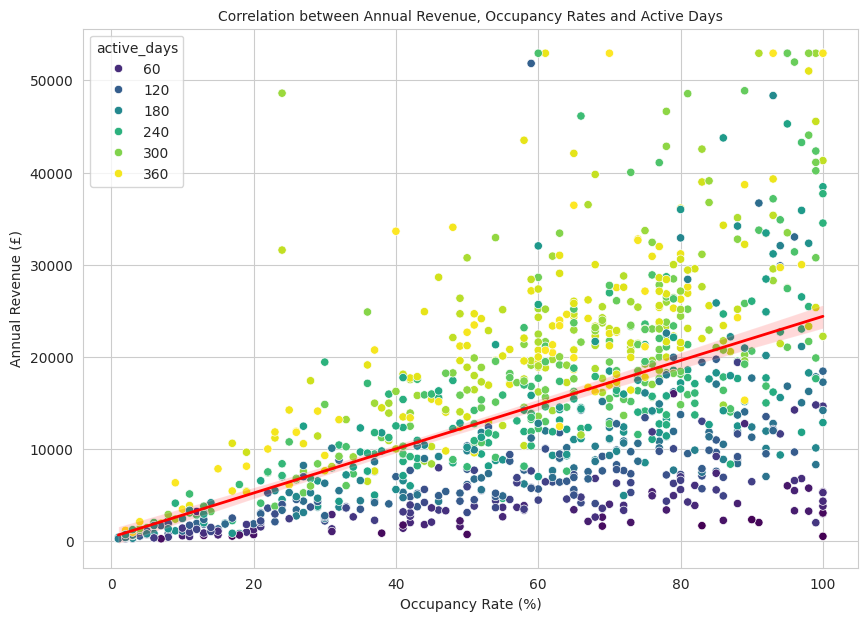

In [73]:
#scatterplot to show correlation between occupancy and revenue
plt.figure(figsize = (10, 7))
plt.title('Correlation between Annual Revenue, Occupancy Rates and Active Days', fontsize=10)

sns.scatterplot(data=data, x= 'occupancy', y='year_revenue', hue='active_days', palette='viridis')

sns.regplot(data=data, x='occupancy', y='year_revenue', scatter=False, color='red', line_kws={'linewidth': 2, 'label': 'Trendline'})

plt.xlabel('Occupancy Rate (%)')
plt.ylabel('Annual Revenue (£)')

Including all these in the model may cause multicollinearity, which may
- distort model interpretability
- inflate the importance of these correlated features
- reduce generalisation

Revenue = avg_daily_rate × active_days × occupancy — so including all three would be redundant.
It is then decided that we will focus on Occupancy rate ('occupancy') as the target variable as revenue outcomes are directly influenced by occupancy rate and it is less affected by the number of active days the property is listed (corr = 0.07). We will exclude active days and is_active as features as this also does not satisfy the study objectives as these are serviced accommodation host dependent features.

> **We will be using occupancy_group ( >= 63% High, <63% Low) as the target variable.**



In [74]:
print(data['beachfront'].value_counts())
print(data['ev_charger'].value_counts())
print(data['smoking_allowed'].value_counts())

beachfront
No     1048
Yes       6
Name: count, dtype: int64
ev_charger
No     1034
Yes      20
Name: count, dtype: int64
smoking_allowed
No     1034
Yes      20
Name: count, dtype: int64


Due to extreme class inbalances, these features are statistically unreliable for modelling and risks overfitting and added noise. These features will be dropped.

## **Data Pre-processing for Machine Learning**



In [75]:
#using cleaned original dataset (not encoded)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1054 entries, 21 to 1330
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   town               1054 non-null   object 
 1   year_revenue       1054 non-null   int64  
 2   avg_daily_rate     1054 non-null   float64
 3   occupancy          1054 non-null   int64  
 4   active_days        1054 non-null   int64  
 5   length_of_stay     1054 non-null   float64
 6   min_stay           1054 non-null   int64  
 7   management         1054 non-null   object 
 8   bedrooms           1054 non-null   int64  
 9   bathrooms          1054 non-null   float64
 10  max_guests         1054 non-null   int64  
 11  listed_price       1054 non-null   int64  
 12  is_active          1054 non-null   object 
 13  economic_category  1054 non-null   object 
 14  blocked_days       1054 non-null   int64  
 15  rating             1054 non-null   float64
 16  num_reviews        1054 non-

In [76]:
df = data.copy()

In [77]:
# Elclude multicollinear/redundant features
drop_cols = ['occupancy', 'year_revenue', 'active_days', 'blocked_days', 'is_active', 'revenue_group', 'beachfront', 'smoking_allowed', 'ev_charger']
df = df.drop(columns=drop_cols)

### Convert binary columns to Booleans

In [79]:
#convert Yes/No columns to boolean
yes_no_cols = ['hot_tub', 'kitchen', 'pool', 'pets_allowed']

for col in yes_no_cols:
  df[col]=df[col].map({'Yes':1, 'No': 0}).astype('bool')


In [80]:
#checking conversion
df.head()

,town,avg_daily_rate,length_of_stay,min_stay,management,bedrooms,bathrooms,max_guests,listed_price,economic_category,rating,num_reviews,hot_tub,kitchen,pool,pets_allowed,occupancy_group
21,Grays,113.31,5.0,4,Moderate,2,1.0,5,130,Upscale,4.86,0,False,True,False,True,Low
22,Grays,119.41,5.0,1,Large,2,2.0,4,152,Upscale,4.42,0,False,True,False,False,Low
23,Grays,156.73,4.0,2,Moderate,2,2.0,5,175,Upscale,5.00,4,False,True,False,False,Low
24,Grays,86.08,6.0,2,Large,2,1.0,5,128,Midscale,4.86,0,False,True,False,False,Low
25,Grays,103.58,4.0,3,Small,2,1.0,4,121,Midscale,4.86,0,False,True,False,False,Low


###Apply One-Hot Encoding to Cateogorical variables

In [81]:
categorical_cols = ['town', 'management', 'economic_category']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head(10)


,avg_daily_rate,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,rating,num_reviews,hot_tub,kitchen,pool,pets_allowed,occupancy_group,town_Chelmsford,town_Clacton-on-Sea,town_Colchester,town_Grays,town_Saffron-Walden,town_Southend-on-Sea,town_Walton-on-Naze,management_Large,management_Moderate,management_Small,management_Unknown,economic_category_Midscale,economic_category_Upscale
21,113.31,5.0,4,2,1.0,5,130,4.86,0,False,True,False,True,Low,False,False,False,True,False,False,False,False,True,False,False,False,True
22,119.41,5.0,1,2,2.0,4,152,4.42,0,False,True,False,False,Low,False,False,False,True,False,False,False,True,False,False,False,False,True
23,156.73,4.0,2,2,2.0,5,175,5.00,4,False,True,False,False,Low,False,False,False,True,False,False,False,False,True,False,False,False,True
24,86.08,6.0,2,2,1.0,5,128,4.86,0,False,True,False,False,Low,False,False,False,True,False,False,False,True,False,False,False,True,False
25,103.58,4.0,3,2,1.0,4,121,4.86,0,False,True,False,False,Low,False,False,False,True,False,False,False,False,False,True,False,True,False
26,95.82,8.0,1,2,1.0,5,144,5.00,4,False,True,False,False,Low,False,False,False,True,False,False,False,True,False,False,False,True,False
27,103.88,3.0,1,2,2.0,3,116,5.00,2,False,True,False,False,Low,False,False,False,True,False,False,False,False,False,False,False,True,False
28,111.79,5.0,2,2,1.0,4,137,5.00,1,False,True,False,False,Low,False,False,False,True,False,False,False,False,False,False,False,False,True
29,110.05,4.0,3,2,1.0,4,116,5.00,2,False,True,False,False,Low,False,False,False,True,False,False,False,False,False,False,False,False,True
30,125.38,10.0,1,2,1.0,4,144,5.00,1,False,True,False,False,Low,False,False,False,True,False,False,False,True,False,False,False,False,True


In [82]:
#format all column names to lower case
df.columns = [col.replace(' ', '_').replace('-', '_').lower() for col in df.columns]
df.head()

,avg_daily_rate,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,rating,num_reviews,hot_tub,kitchen,pool,pets_allowed,occupancy_group,town_chelmsford,town_clacton_on_sea,town_colchester,town_grays,town_saffron_walden,town_southend_on_sea,town_walton_on_naze,management_large,management_moderate,management_small,management_unknown,economic_category_midscale,economic_category_upscale
21,113.31,5.0,4,2,1.0,5,130,4.86,0,False,True,False,True,Low,False,False,False,True,False,False,False,False,True,False,False,False,True
22,119.41,5.0,1,2,2.0,4,152,4.42,0,False,True,False,False,Low,False,False,False,True,False,False,False,True,False,False,False,False,True
23,156.73,4.0,2,2,2.0,5,175,5.00,4,False,True,False,False,Low,False,False,False,True,False,False,False,False,True,False,False,False,True
24,86.08,6.0,2,2,1.0,5,128,4.86,0,False,True,False,False,Low,False,False,False,True,False,False,False,True,False,False,False,True,False
25,103.58,4.0,3,2,1.0,4,121,4.86,0,False,True,False,False,Low,False,False,False,True,False,False,False,False,False,True,False,True,False


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1054 entries, 21 to 1330
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_daily_rate              1054 non-null   float64
 1   length_of_stay              1054 non-null   float64
 2   min_stay                    1054 non-null   int64  
 3   bedrooms                    1054 non-null   int64  
 4   bathrooms                   1054 non-null   float64
 5   max_guests                  1054 non-null   int64  
 6   listed_price                1054 non-null   int64  
 7   rating                      1054 non-null   float64
 8   num_reviews                 1054 non-null   int64  
 9   hot_tub                     1054 non-null   bool   
 10  kitchen                     1054 non-null   bool   
 11  pool                        1054 non-null   bool   
 12  pets_allowed                1054 non-null   bool   
 13  occupancy_group             1054 non-

### Target variable

#### Encoding

In [84]:
label_encoder = LabelEncoder()
df['occupancy_group'] = label_encoder.fit_transform(df['occupancy_group'])  # 'low' = 0, 'high' = 1


#### Checking for class imbalance in the target variable

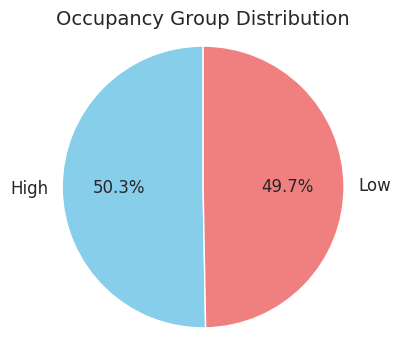

In [85]:
occupancy_counts = df['occupancy_group'].value_counts()
labels = label_encoder.inverse_transform(occupancy_counts.index)  # e.g., ['low', 'high']
sizes = occupancy_counts.values
colors = ['skyblue', 'lightcoral']  # Customize as you like

# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Occupancy Group Distribution', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

As the median was used to determine thresholds of occupancy rate, the target variable is balanced.


### Split the dataset into training and test sets

In [86]:
X = df.drop(['occupancy_group'], axis=1)  #drop the target variable
y = df[['occupancy_group']]

In [87]:
X = df.drop(columns=['occupancy_group'])
y = df['occupancy_group']

In [88]:
#splitting the data into train, val and test sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)




In [89]:
print(f"X_train:{X_train.shape}")
print(f"y_train:{y_train.shape}")
print(f"X_test:{X_test.shape}")
print(f"y_test:{y_test.shape}")
print(f"X_val:{X_val.shape}")
print(f"y_val:{y_val.shape}")

X_train:(737, 26)
y_train:(737,)
X_test:(159, 26)
y_test:(159,)
X_val:(158, 26)
y_val:(158,)


### Feature Scaling


In [90]:
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_cols].head()

,avg_daily_rate,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,rating,num_reviews
673,102.58,22.0,2,2,2.0,5,145,5.00,2
383,120.73,9.0,2,2,1.5,4,140,5.00,15
538,86.82,7.0,3,2,1.0,4,95,4.97,111
1211,69.23,3.0,1,3,1.0,6,70,4.86,3
233,198.42,2.0,1,2,1.0,5,199,4.79,67


In [91]:
col_to_scale = ['avg_daily_rate', 'length_of_stay', 'min_stay','bedrooms', 'bathrooms','max_guests','listed_price', 'rating', 'num_reviews' ]
scaler = StandardScaler()
X_train[col_to_scale] = scaler.fit_transform(X_train[col_to_scale])
X_test[col_to_scale] = scaler.fit_transform(X_test[col_to_scale])
X_val[col_to_scale] = scaler.fit_transform(X_val[col_to_scale])

In [92]:
X_train[col_to_scale].head()

,avg_daily_rate,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,rating,num_reviews
673,-0.201863,1.325765,-0.253720,-0.753714,0.943254,-0.029381,0.176906,0.613321,-0.491604
383,0.238100,-0.199287,-0.253720,-0.753714,0.069915,-0.776073,0.077273,0.613321,-0.215565
538,-0.583891,-0.433910,0.459988,-0.753714,-0.803425,-0.776073,-0.819426,0.546668,1.822877
1211,-1.010279,-0.903157,-0.967428,1.326763,-0.803425,0.717310,-1.317592,0.302274,-0.470370
233,2.121334,-1.020469,-0.967428,-0.753714,-0.803425,-0.029381,1.252945,0.146751,0.888591


In [93]:
X_test[col_to_scale].head()

,avg_daily_rate,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,rating,num_reviews
352,-0.371343,-0.708384,-1.043124,-0.831558,-0.718498,-0.816915,-0.286719,-2.696272,-0.504006
88,-0.540357,-0.323094,-0.354922,-0.831558,-0.718498,-0.816915,-0.848767,0.489304,2.117214
531,2.093559,-0.965245,-1.043124,-0.831558,-0.718498,-0.816915,1.711673,-1.370598,-0.538495
814,-0.732805,1.089636,3.086089,-0.831558,-0.718498,-0.816915,-0.578151,0.331014,-0.555740
1043,0.631614,-0.708384,-0.354922,1.202561,2.137533,-0.110994,0.379412,0.232083,-0.107374


In [94]:
X_val[col_to_scale].head()


,avg_daily_rate,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,rating,num_reviews
562,-0.633841,-0.165434,-1.060777,-0.680414,1.099786,-0.787726,-0.540583,-0.361488,0.256171
410,-1.110650,-1.147165,1.599585,-0.680414,-0.739009,-0.787726,-0.449306,0.331516,-0.755704
142,-0.418069,-0.042718,-0.173990,-0.680414,-0.739009,-0.787726,-0.609040,0.023514,-0.525732
1177,0.599142,-0.533583,-0.173990,1.469694,-0.739009,-0.787726,0.280907,-0.168987,-0.640718
1131,-0.691324,-0.410867,-0.173990,1.469694,-0.739009,-0.787726,-0.700317,-0.919742,-0.433744


In [95]:
assert (X_train.dtypes == X_test.dtypes).all()

In [96]:
assert (X_test.dtypes == X_val.dtypes).all()

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 737 entries, 673 to 667
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_daily_rate              737 non-null    float64
 1   length_of_stay              737 non-null    float64
 2   min_stay                    737 non-null    float64
 3   bedrooms                    737 non-null    float64
 4   bathrooms                   737 non-null    float64
 5   max_guests                  737 non-null    float64
 6   listed_price                737 non-null    float64
 7   rating                      737 non-null    float64
 8   num_reviews                 737 non-null    float64
 9   hot_tub                     737 non-null    bool   
 10  kitchen                     737 non-null    bool   
 11  pool                        737 non-null    bool   
 12  pets_allowed                737 non-null    bool   
 13  town_chelmsford             737 non-nu

## MODELLING

As this is a classification problem, we will be using the following machine learning algorithms to compare and build the model

- Logistic Regression
- Random Forest
- SVM

In [98]:
#Logistic Regression
logreg = LogisticRegression(max_iter=5000, random_state=42)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_val)

In [99]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)

In [100]:
# SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_val)

In [102]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(classification_report(y_true, y_pred))

In [103]:
evaluate_model("Random Forest", y_val, rf_preds)
evaluate_model("Logistic Regression", y_val, logreg_preds)
evaluate_model("SVM", y_val, svm_preds)


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.65      0.57      0.61        79
           1       0.62      0.70      0.65        79

    accuracy                           0.63       158
   macro avg       0.64      0.63      0.63       158
weighted avg       0.64      0.63      0.63       158


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        79
           1       0.71      0.68      0.70        79

    accuracy                           0.70       158
   macro avg       0.70      0.70      0.70       158
weighted avg       0.70      0.70      0.70       158


SVM Evaluation:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68        79
           1       0.68      0.68      0.68        79

    accuracy                           0.68       158
   macro avg       0.68      0.68      0.68       1

In [104]:
#  Compare ROC AUC
print("\nROC AUC Scores:")
print("Logistic Regression", roc_auc_score(y_val, logreg.predict_proba(X_val)[:,1]))
print("Random Forest:", roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1]))
print("SVM:", roc_auc_score(y_val, svm.predict_proba(X_val)[:, 1]))


ROC AUC Scores:
Logistic Regression 0.768146130427816
Random Forest: 0.708860759493671
SVM: 0.7417080596058323


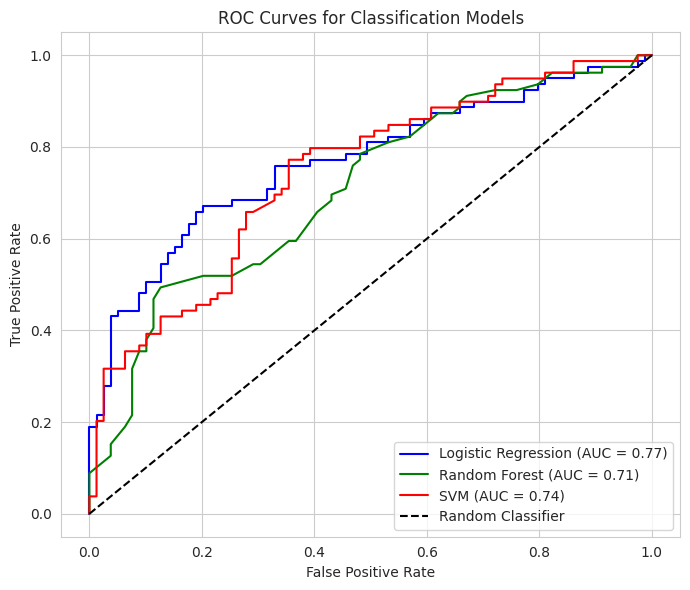

In [121]:

# Get ROC curve values for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_val, logreg.predict_proba(X_val)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_val, rf.predict_proba(X_val)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_val, svm.predict_proba(X_val)[:, 1])

auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)

# Plot
plt.figure(figsize=(7, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='red')

# Reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

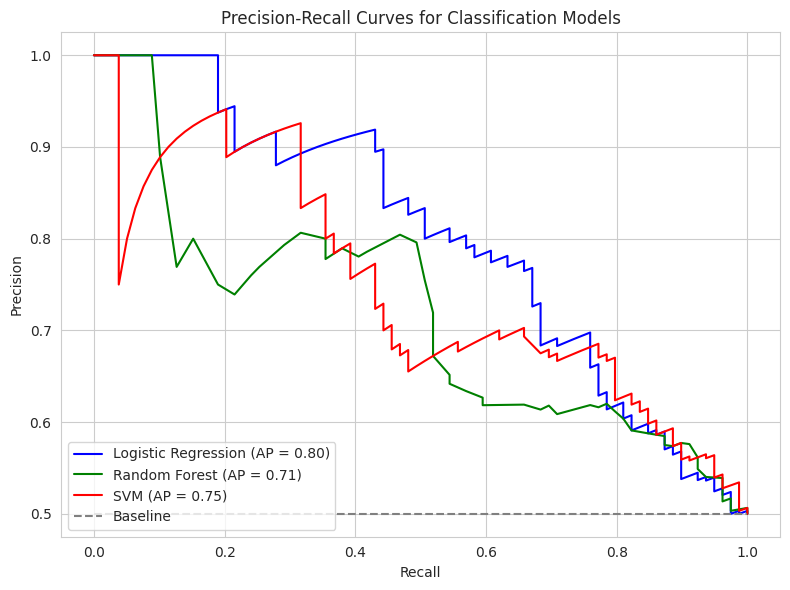

In [109]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get precision-recall values for each model
precision_logreg, recall_logreg, _ = precision_recall_curve(y_val, logreg.predict_proba(X_val)[:, 1])
precision_rf, recall_rf, _ = precision_recall_curve(y_val, rf.predict_proba(X_val)[:, 1])
precision_svm, recall_svm, _ = precision_recall_curve(y_val, svm.predict_proba(X_val)[:, 1])

# Calculate average precision score (area under the PR curve)
ap_logreg = average_precision_score(y_val, logreg.predict_proba(X_val)[:, 1])
ap_rf = average_precision_score(y_val, rf.predict_proba(X_val)[:, 1])
ap_svm = average_precision_score(y_val, svm.predict_proba(X_val)[:, 1])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall_logreg, precision_logreg, label=f'Logistic Regression (AP = {ap_logreg:.2f})', color='blue')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {ap_rf:.2f})', color='green')
plt.plot(recall_svm, precision_svm, label=f'SVM (AP = {ap_svm:.2f})', color='red')

# Reference line (average prevalence)
baseline = sum(y_val) / len(y_val)
plt.hlines(baseline, xmin=0, xmax=1, colors='gray', linestyles='--', label='Baseline')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Classification Models')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

📈 Precision-Recall Curve Analysis
The Precision-Recall (PR) curves further highlight how well each model handles the trade-off between precision (positive predictive value) and recall (sensitivity). This is especially important in slightly imbalanced datasets like ours, where ROC curves alone may not provide the full picture.

From the PR plot:

Logistic Regression surprisingly achieved the highest Average Precision (AP = 0.80), suggesting that despite its weaker performance in other metrics, it performed well in correctly identifying high-occupancy listings when it predicted them.

The Support Vector Machine (SVM) followed with an AP of 0.75, showing balanced precision and recall throughout most of the range. It maintained consistent performance across varying thresholds.

The Random Forest model, while strong in confusion matrix and ROC AUC, achieved the lowest AP (0.71), indicating more variability in its confidence when predicting positives. It may have overpredicted the high-occupancy class, as reflected by its higher false positive count.


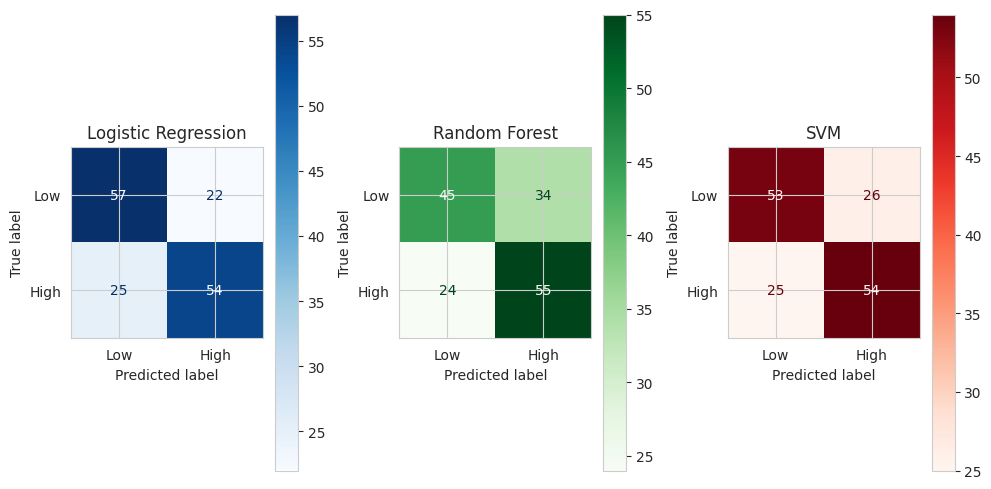

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Logistic Regression
cm_logreg = confusion_matrix(y_val, logreg.predict(X_val))
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=["Low", "High"])
disp_logreg.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title("Logistic Regression")

# Random Forest
cm_rf = confusion_matrix(y_val, rf.predict(X_val))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Low", "High"])
disp_rf.plot(ax=axes[1], cmap='Greens', values_format='d')
axes[1].set_title("Random Forest")

# SVM
cm_svm = confusion_matrix(y_val, svm.predict(X_val))
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Low", "High"])
disp_svm.plot(ax=axes[2], cmap='Reds', values_format='d')
axes[2].set_title("SVM")

plt.tight_layout()
plt.show()

###📄 Confusion Matrix Analysis
To gain a deeper understanding of model performance, confusion matrices were evaluated for each classifier. These matrices show how accurately each model predicted properties as either high or low occupancy.

The Logistic Regression model correctly classified 57 low and 54 high occupancy properties but made 47 misclassifications (22 false positives and 25 false negatives). While slightly better at detecting low occupancy, the model’s errors are fairly evenly distributed, indicating limited predictive power.

The Random Forest model correctly identified 100 listings (45 low and 55 high), but had the highest number of false positives (34). This suggests the model was more aggressive in predicting high occupancy, possibly aiming to maximize recall at the cost of precision.

The SVM model showed performance similar to Logistic Regression, correctly classifying 107 listings (53 low, 54 high), and misclassifying 51. Its false positives (26) and false negatives (25) were nearly balanced, indicating a conservative but consistent boundary between classes.

Overall, Random Forest produced the highest number of true positives (55), which is important when high occupancy is the more desirable class to predict accurately. However, its elevated false positive rate suggests the model is more optimistic than precise. Despite that, its stronger performance across other metrics (ROC AUC, Precision-Recall) still makes it a leading candidate for deployment.

In [119]:
# Create stratified k-folds (preserves class balance in each fold)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC()
}

# Loop through models and evaluate with cross_val_score
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # essential for SVM and LR
        ('clf', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='accuracy')

    print(f"{name}:")
    print(f"  Accuracy per fold: {scores}")
    print(f"  Mean Accuracy: {scores.mean():.4f}")
    print(f"  Std Dev: {scores.std():.4f}\n")

Logistic Regression:
  Accuracy per fold: [0.52702703 0.61486486 0.65986395 0.68027211 0.57823129]
  Mean Accuracy: 0.6121
  Std Dev: 0.0554

Random Forest:
  Accuracy per fold: [0.58783784 0.67567568 0.6462585  0.7414966  0.68027211]
  Mean Accuracy: 0.6663
  Std Dev: 0.0500

SVM:
  Accuracy per fold: [0.52702703 0.63513514 0.68027211 0.68707483 0.66666667]
  Mean Accuracy: 0.6392
  Std Dev: 0.0589



Show the mean accuracy and standard deviation for each model.

Briefly explain that you used StratifiedKFold to preserve class distribution.

Mention that you used a pipeline to avoid data leakage (scaling done within each fold).



# Print confusion matrix counts
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_val, logreg.predict(X_val)))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_val, rf.predict(X_val)))

In [181]:
def accuracy(y_val, y_pred):
    acc = accuracy_score(y_val, y_pred)
    return round(acc*100, 2)

In [163]:
param_dist = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

random_search = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=5000, random_state=42),
    param_distributions=param_dist,
    n_iter=5,
    cv=10,
    random_state=42,
    n_jobs=-1
)

In [183]:
random_search.fit(X_train, y_train)
best_logreg = random_search.best_estimator_
best_logreg

LogisticRegression(C=0.1, max_iter=5000, random_state=42, solver='liblinear')

In [184]:
y_pred_best = best_logreg.predict(X_val)
y_pred_best_prob = best_logreg.predict_proba(X_val)[:, 1]
print("Accuracy of the model: {}%".format(accuracy(y_val, y_pred_best)))

Accuracy of the model: 68.99%


In [166]:
def plot_roc_curve(y_val, y_pred_prob, model_name):
    roc_auc = roc_auc_score(y_val, y_pred_prob)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='deepskyblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='m', lw=2, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt

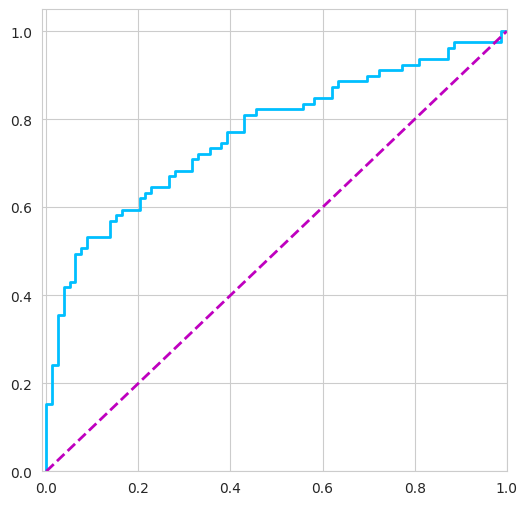

In [167]:
plot_roc_curve(
    y_val=y_val,
    y_pred_prob=y_pred_best_prob,
    model_name="Logistic Regression"
)

In [ ]:
def accuracy(y_val, y_pred):
    acc = accuracy_score(y_val, y_pred)
    return round(acc*100, 2)

In [175]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(classification_report(y_true, y_pred))

In [179]:
cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='f1')

array([0.55696203, 0.65822785, 0.67132867, 0.68055556, 0.66206897])